# Initial EDA

In [11]:
# ---- Imports ----
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("../data/raw/synthetic_coffee_health_10000.csv")
data.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [ ]:
# ---- Glance at the missing values ----
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [ ]:
# ---- Descriptive Statistics ----
data.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


# First glance at the data

Our dataset is composed of 10,000 instances with 15 variables.

The info is pretty much complete no Null Values, the only column with missing values is "Healt_Issues" with 5941 NaN values but this mean the individual has no Healt Issues at all.

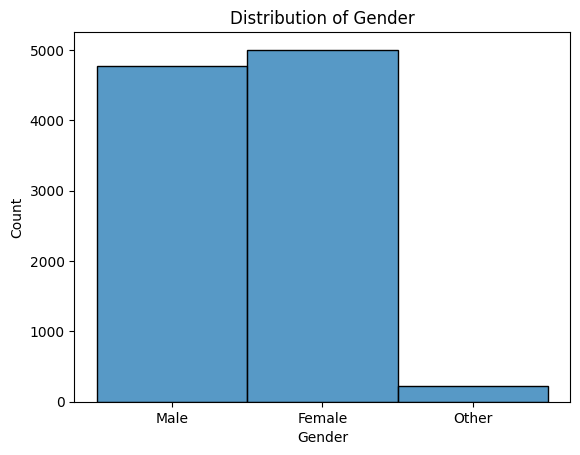

In [36]:
sns.histplot(data['Gender'])
plt.title('Distribution of Gender')
plt.show()

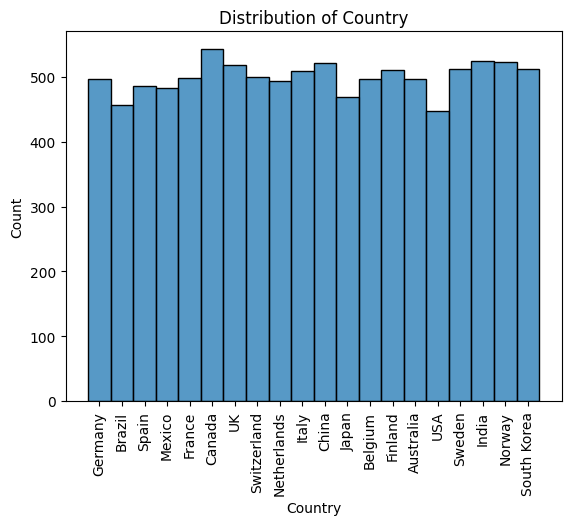

In [31]:
sns.histplot(data['Country'])
plt.title('Distribution of Country')
plt.xticks(rotation=90)
plt.show()

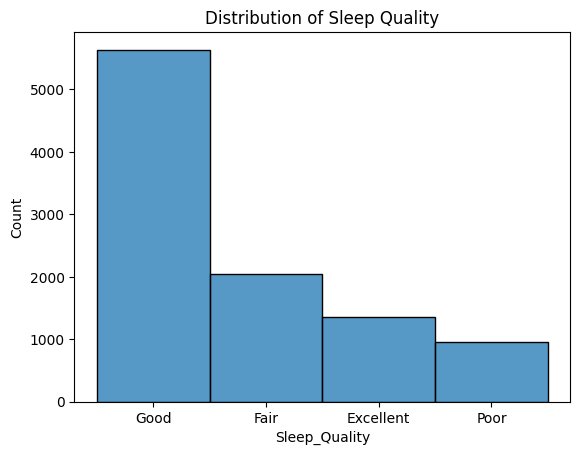

In [ ]:
sns.histplot(data['Sleep_Quality'])
plt.title('Distribution of Sleep Quality')
plt.show()

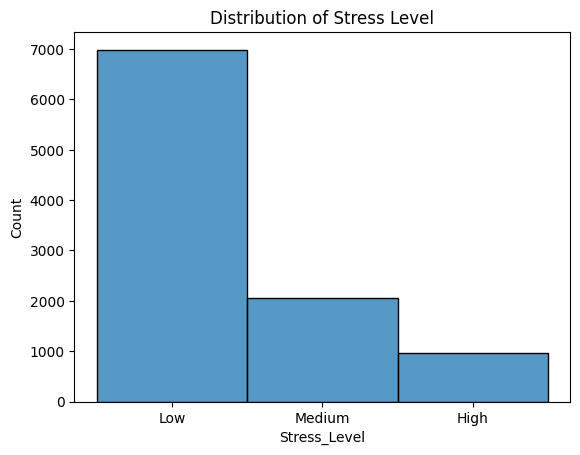

In [37]:
sns.histplot(data['Stress_Level'])
plt.title('Distribution of Stress Level')
plt.show()

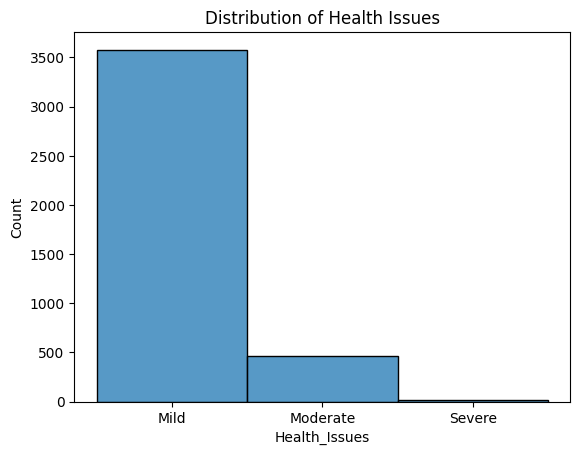

In [38]:
sns.histplot(data['Health_Issues'].dropna())
plt.title('Distribution of Health Issues')
plt.show()

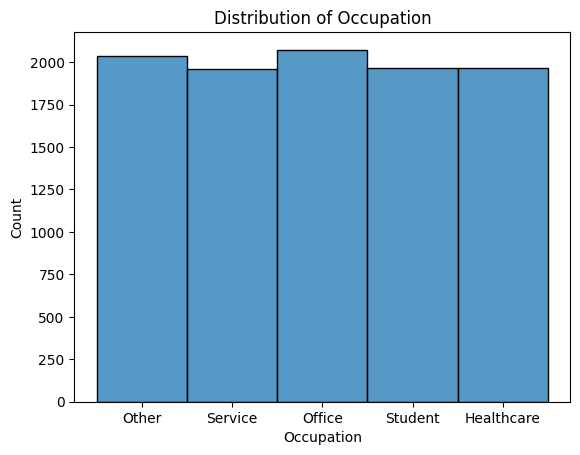

In [39]:
sns.histplot(data['Occupation'])
plt.title('Distribution of Occupation')
plt.show()

Smoking
0    7996
1    2004
Name: count, dtype: int64


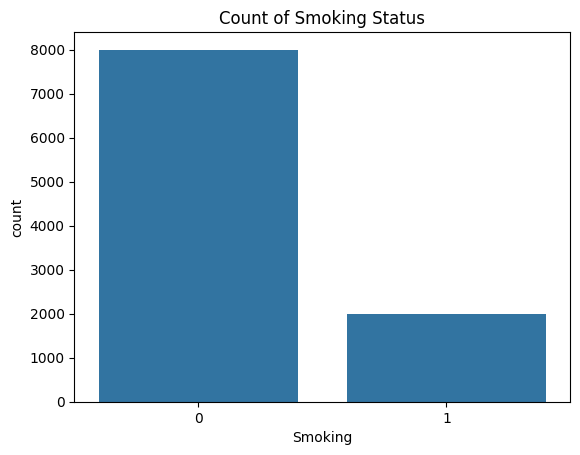

In [ ]:
conteo = data.value_counts(data['Smoking'])
print(conteo)
sns.countplot(x='Smoking', data=data)
plt.title('Count of Smoking Status')
plt.show()

Alcohol_Consumption
0    6993
1    3007
Name: count, dtype: int64


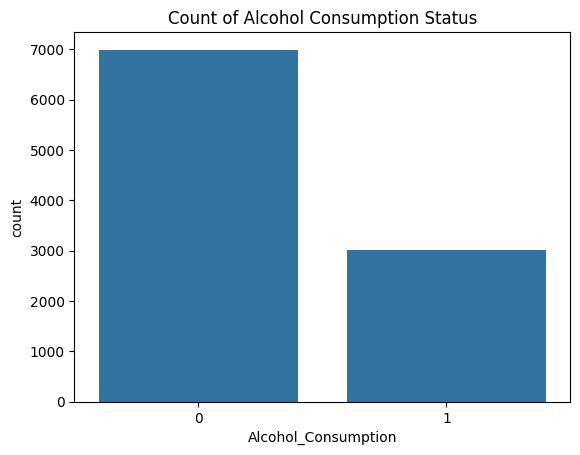

In [ ]:
conteo = data.value_counts(data['Alcohol_Consumption'])
print(conteo)
sns.countplot(x='Alcohol_Consumption', data=data)
plt.title('Count of Alcohol Consumption Status')
plt.show()

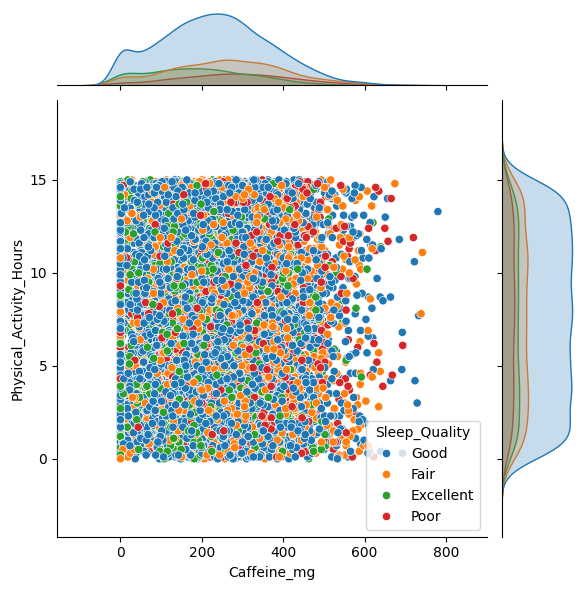

In [66]:
sns.jointplot(data=data, y="Physical_Activity_Hours", x="Caffeine_mg", hue="Sleep_Quality")

# Unbalanced classes

There are many classes with unbalanced values, such as the Alcohol Consumption, the Smoking Status, the Gender and the Health Issues, we will have to balance this classes in order to improve the predictive cappacity of our models in the future.

# ANOVA

We will proceed with ANOVA to check wich Variables affect the most our target "Sleep_Quality"

But first we will have to balance this class. 

In [ ]:
# ---- Import Libraries for ANOVA ----


# High Importance Classes

We will take an exhaustive look on certain variables that we think have an special importance on the the question we are trying to answer. 

What influenciates the most on the Sleep Quality.




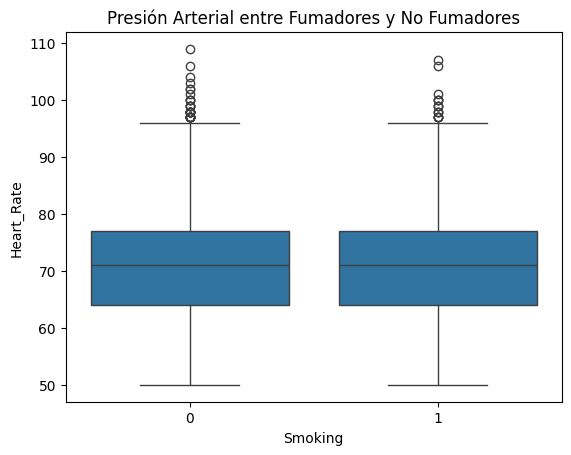

In [64]:
sns.boxplot(x='Smoking', y='Heart_Rate', data=data)
plt.title('Presión Arterial entre Fumadores y No Fumadores')
plt.show()